<a href="https://colab.research.google.com/github/Sonarajan04/DeepLearning_projects/blob/main/ANN_lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/lung_cancer_examples.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [4]:
df.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [5]:
X=df.iloc[:,2:-1]
X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [6]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.28813559, 0.08823529, 0.44444444, 0.5       ],
       [0.15254237, 0.58823529, 0.11111111, 0.625     ],
       [0.20338983, 0.        , 0.44444444, 0.25      ],
       [0.16949153, 0.        , 0.77777778, 0.125     ],
       [0.84745763, 0.11764706, 0.44444444, 0.75      ],
       [0.27118644, 0.        , 1.        , 0.        ],
       [0.6779661 , 0.44117647, 1.        , 0.        ],
       [0.06779661, 0.35294118, 0.44444444, 0.25      ],
       [0.45762712, 0.05882353, 0.55555556, 0.        ],
       [0.57627119, 0.52941176, 0.33333333, 0.625     ],
       [0.25423729, 0.11764706, 0.77777778, 0.        ],
       [0.        , 0.29411765, 0.55555556, 0.375     ],
       [0.11864407, 0.05882353, 0.44444444, 0.125     ],
       [0.16949153, 0.58823529, 0.11111111, 1.        ],
       [0.27118644, 0.73529412, 0.33333333, 1.        ],
       [0.3559322 , 0.52941176, 0.77777778, 0.125     ],
       [0.40677966, 0.64705882, 0.22222222, 0.625     ],
       [0.01694915, 0.35294118,

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
y.value_counts()

Result
0    31
1    28
Name: count, dtype: int64

In [11]:
model=Sequential()
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,batch_size=4,epochs=50)

Epoch 1/50
11/11 [==============================] - 5s 6ms/step - loss: 0.7028 - accuracy: 0.5122
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6995 - accuracy: 0.5122
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - loss: 0.6974 - accuracy: 0.5122
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.4878
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6935 - accuracy: 0.4634
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5122
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5122
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5366
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5366
Epoch 10/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5366
Epoch 11/50
11/11

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 5)                 25        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
loss,accuracy=model.evaluate(X_test,y_test)
print('loss',loss)
print('accuracy',accuracy)

1/1 [==============================] - 0s 245ms/step - loss: 0.6692 - accuracy: 0.7778
loss 0.669192373752594
accuracy 0.7777777910232544


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
y_new=model.predict(scaler.transform([[40,20,3,4]]))
y_new

1/1 [==============================] - 0s 163ms/step


array([[0.49305323]], dtype=float32)

In [18]:
if y_new>0.5:
  print('lung cancer')
else:
  print('no cancer')

no cancer


In [19]:
y_test.values

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [20]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

1/1 [==============================] - 0s 35ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.43      0.60         7

    accuracy                           0.78        18
   macro avg       0.87      0.71      0.72        18
weighted avg       0.84      0.78      0.75        18



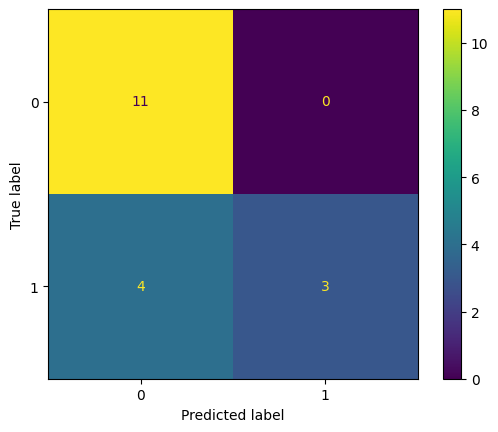

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))